![Los Angeles skyline](la_skyline.jpg)

Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World! 

Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs. However, as with any highly populated city, it isn't always glamorous and there can be a large volume of crime. That's where you can help!

You have been asked to support the Los Angeles Police Department (LAPD) by analyzing crime data to identify patterns in criminal behavior. They plan to use your insights to allocate resources effectively to tackle various crimes in different areas.

## The Data

They have provided you with a single dataset to use. A summary and preview are provided below.

It is a modified version of the original data, which is publicly available from Los Angeles Open Data.

# crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |

In [1]:
# Re-run this cell
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
crimes = pd.read_csv("crimes.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST


In [2]:
# Start coding here
# Use as many cells as you need
# Checking column types
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185715 entries, 0 to 185714
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   DR_NO         185715 non-null  int64         
 1   Date Rptd     185715 non-null  datetime64[ns]
 2   DATE OCC      185715 non-null  datetime64[ns]
 3   TIME OCC      185715 non-null  object        
 4   AREA NAME     185715 non-null  object        
 5   Crm Cd Desc   185715 non-null  object        
 6   Vict Age      185715 non-null  int64         
 7   Vict Sex      185704 non-null  object        
 8   Vict Descent  185705 non-null  object        
 9   Weapon Desc   73502 non-null   object        
 10  Status Desc   185715 non-null  object        
 11  LOCATION      185715 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(8)
memory usage: 17.0+ MB


In [3]:
crimes[['TIME OCC','DATE OCC','Date Rptd']].head(100)

,TIME OCC,DATE OCC,Date Rptd
0,1110,2020-05-12,2022-07-22
1,1620,2020-06-04,2022-08-06
2,1200,2020-08-17,2022-08-18
3,0635,2020-01-27,2023-02-27
4,0900,2020-07-14,2022-07-14
...,...,...,...
95,0900,2020-12-27,2022-08-10
96,1010,2020-11-08,2022-08-17
97,1020,2020-02-28,2022-08-19
98,1200,2020-08-01,2022-07-12


In [4]:
# Extracting hours from "TIme OCC"
crimes['HOUR OCC'] = crimes['TIME OCC'].str[:2]
crimes['HOUR OCC'].head(100)

0     11
1     16
2     12
3     06
4     09
      ..
95    09
96    10
97    10
98    12
99    00
Name: HOUR OCC, Length: 100, dtype: object

In [5]:
#Grouping by hour of occurence 
crimes_by_hour_df = crimes.copy()
crimes_by_hour_df = crimes.groupby('HOUR OCC', as_index= False).agg(Count = ('HOUR OCC', 'size')).sort_values('Count', ascending= False)
peak_crime_hour = int(crimes_by_hour_df['HOUR OCC'].head(1))
print(peak_crime_hour)


12


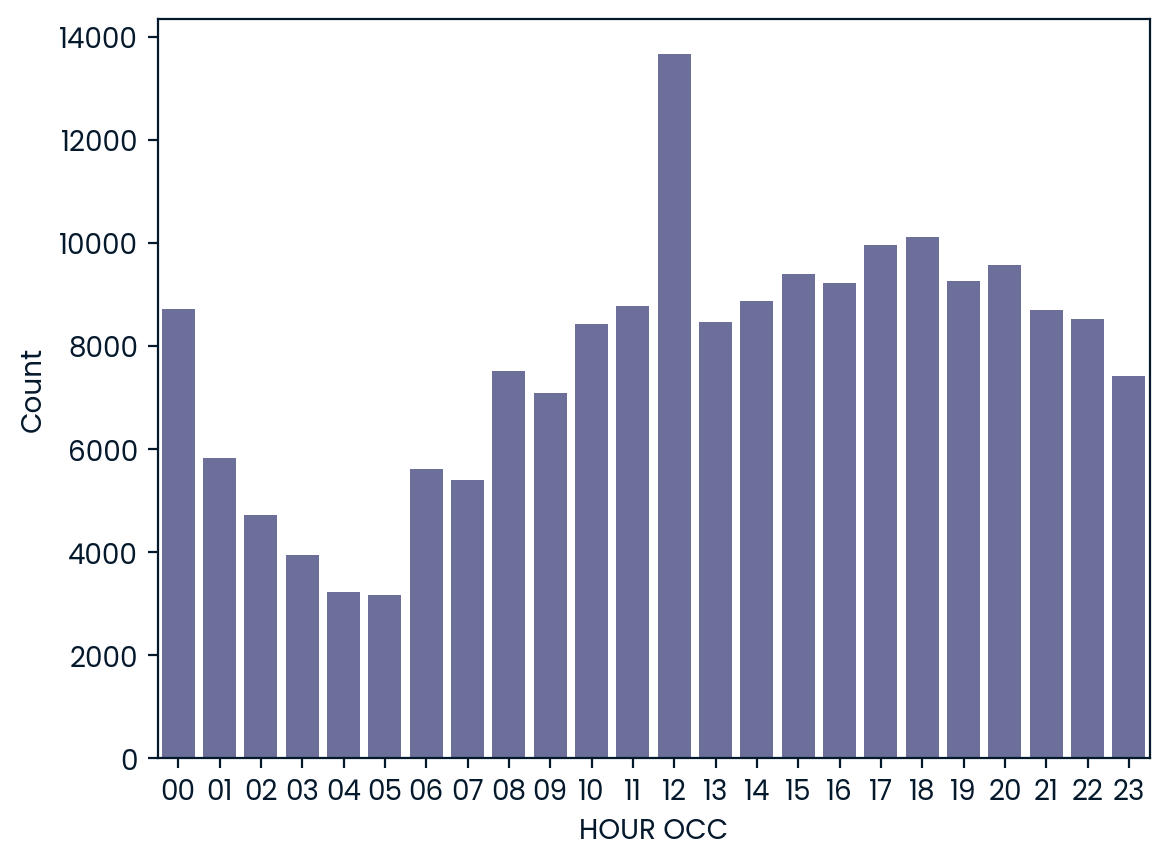

In [6]:
#plotting the amount of crimes by hour
sorted_hours = crimes_by_hour_df['HOUR OCC'].sort_values().unique()
sns.barplot(data=crimes_by_hour_df, x='HOUR OCC', y='Count', order=sorted_hours)
plt.show()

In [7]:
# searching for peak night crime location
crimes_copy = crimes.copy()
crimes_copy['TIME OCC'] = crimes_copy['TIME OCC'].str[:2] + ':' + crimes_copy['TIME OCC'].str[2:]
crimes_copy['HOUR OCC'] = pd.to_datetime(crimes_copy['TIME OCC'], format='%H:%M').dt.time
#preparing for filtering
from datetime import datetime
end_night = datetime.strptime('03:59', '%H:%M').time()
middle_night = datetime.strptime('00:00', '%H:%M').time()
middle_night_2 = datetime.strptime('23:59', '%H:%M').time()
start_night = datetime.strptime('22:00', '%H:%M').time()

# filtering rows
night_crimes = crimes_copy[
    crimes_copy['HOUR OCC'].apply(lambda x: (start_night <= x <= middle_night_2) | (middle_night <= x <= end_night))
]
night_crimes = night_crimes.groupby('AREA NAME',as_index = False).agg(COUNT=('AREA NAME', 'size')).sort_values('COUNT', ascending=False)
night_crimes = night_crimes.reset_index()
night_crimes.head()


,index,AREA NAME,COUNT
0,1,Central,3312
1,6,Hollywood,2699
2,0,77th Street,2558
3,15,Southwest,2347
4,14,Southeast,2218


In [8]:
peak_night_crime_location = night_crimes['AREA NAME'].iloc[0]
print(peak_night_crime_location)

Central


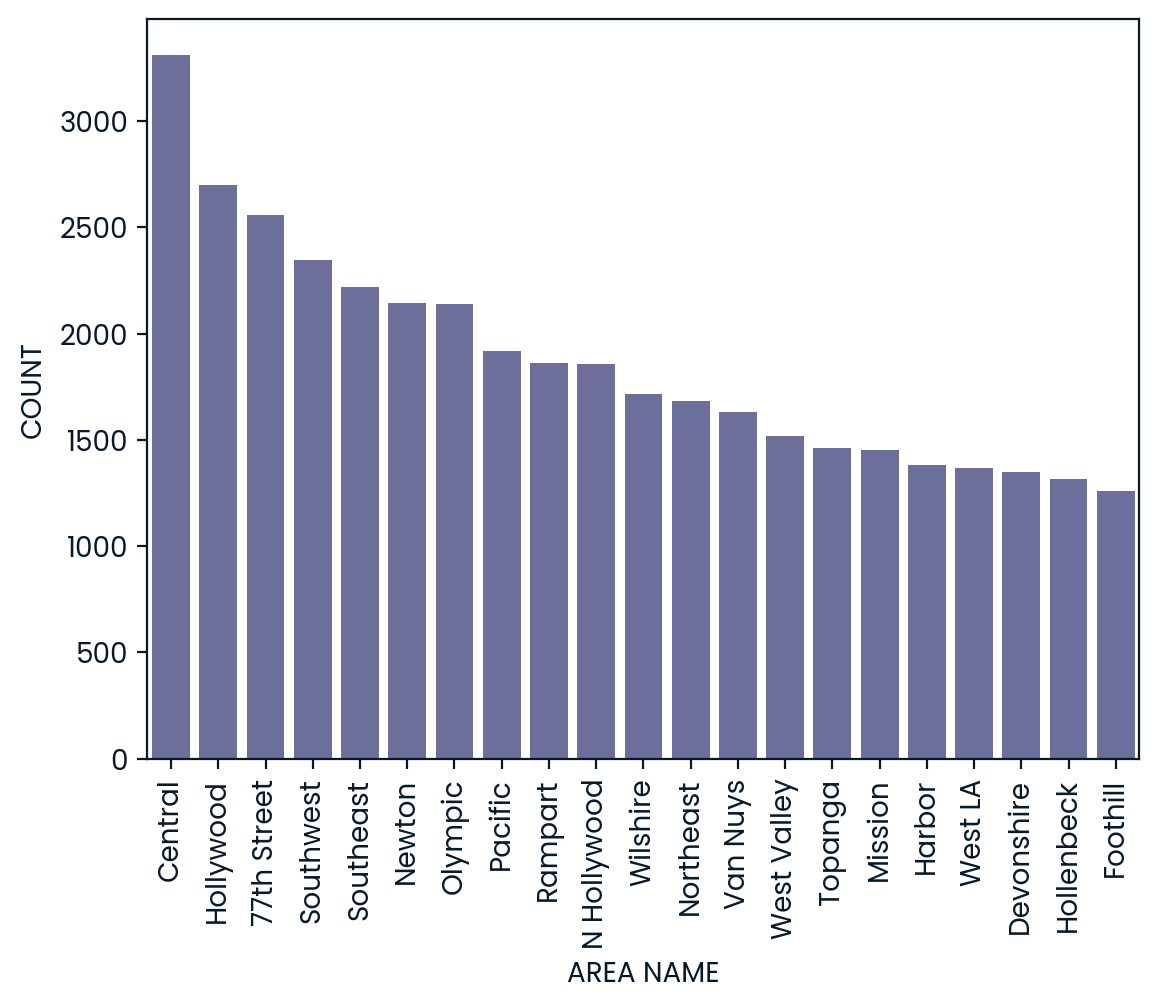

In [13]:
sns.barplot(data = night_crimes , x = 'AREA NAME', y= 'COUNT')
plt.xticks(rotation=90)
plt.show()

In [10]:
crimes_per_victim_age = crimes.copy()
#searching crimes per victim age 
#preparing bins
age_bins = [0,17,25,34,44,54,64,100]
#preparing labels for age brackets 
age_labels = ["0-17","18-25", "26-34", "35-44", "45-54", "55-64","65+"]
#creating brackets column
crimes_per_victim_age["Age Group"] = pd.cut(crimes_per_victim_age['Vict Age'],bins=age_bins,labels=age_labels, right = True)
crimes_per_victim_age = crimes_per_victim_age.groupby("Age Group").agg(Frequency = ("Age Group","size")).sort_values('Age Group')
crimes_per_victim_age.head() 
victim_ages = crimes_per_victim_age['Frequency']
print(victim_ages)

Age Group
0-17      4528
18-25    28291
26-34    47470
35-44    42157
45-54    28353
55-64    20169
65+      14747
Name: Frequency, dtype: int64


In [11]:
import matplotlib.cm as cm
import matplotlib.colors as mcolors

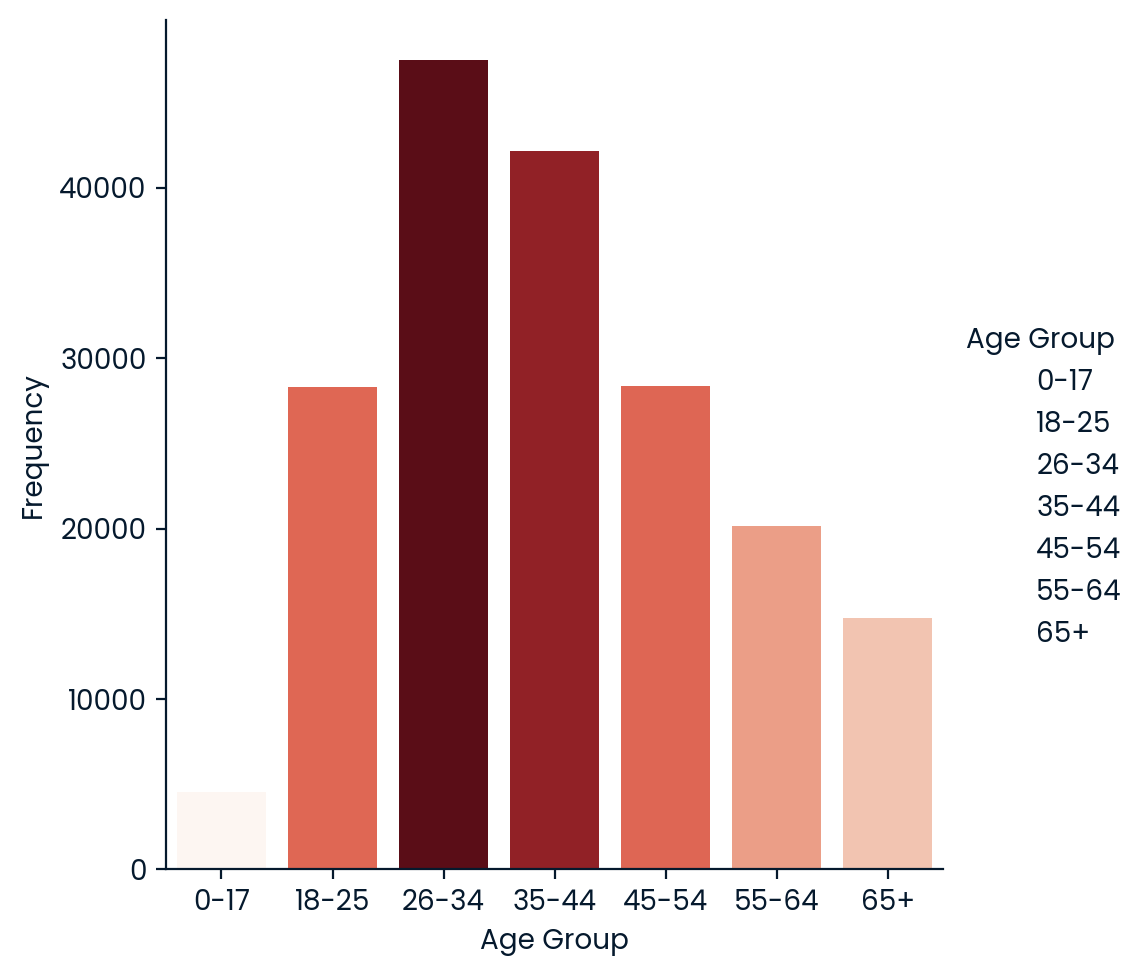

In [12]:

norm = mcolors.Normalize(vmin=crimes_per_victim_age["Frequency"].min(), vmax=crimes_per_victim_age["Frequency"].max())
colors = [cm.Reds(norm(freq)) for freq in crimes_per_victim_age["Frequency"]]
sns.catplot(data=crimes_per_victim_age, x="Age Group", y="Frequency",order=crimes_per_victim_age["Frequency"].index, palette=colors, kind='bar')
plt.show()